# Ajustando DataSet

In [58]:
import pandas as pd
import numpy as np

df = pd.read_csv('./datasets/diabetic_data.csv', sep=',')

# Transformar valores com '?' para NaN
df.replace('?', np.nan, inplace=True) 

print(f'DF Shape: {df.shape}')
df.head(5)

DF Shape: (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


- Identificar colunas problemáticas

In [59]:
print(df.isnull().sum())                

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

- Excluir todas as colunas problemáticas

In [60]:
df = df.drop(columns=[
    'encounter_id',
    'patient_nbr',
    'weight',
    'payer_code',
    'medical_specialty',
    'max_glu_serum',
    'A1Cresult'
])

print(df.isnull().sum())

race                        2273
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
miglitol                       0
troglitazo

## Preenchimento de valores vazios

### Preencher colunas categóricas

In [61]:
def converter(df, coluna):
    moda = df[coluna].mode()[0]
    df[coluna].fillna(moda, inplace=True)

### Preencher coluna 'race'
- Usar a mediana

In [62]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [63]:
converter(df, 'race')
df['race'].value_counts()

C:\Users\JOHNCLAUDECAMERONCHA\AppData\Local\Temp\ipykernel_7212\3418424454.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coluna].fillna(moda, inplace=True)


race
Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

### Preencher coluna diag_1, diag_2, diag_3

In [64]:
# diag_1
converter(df, 'diag_1')
converter(df, 'diag_2')
converter(df, 'diag_3')

C:\Users\JOHNCLAUDECAMERONCHA\AppData\Local\Temp\ipykernel_7212\3418424454.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coluna].fillna(moda, inplace=True)


### Verificar se existe mais algum valor problemático

In [65]:
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipto

## Mapeando colunas

### admission_type_id

In [66]:
def map_admission_type_id(admission_type_id):
    
    mapping = {
        1: 'Emergency',
        2: 'Urgent',
        3: 'Elective',
        4: 'Newborn',
        5: 'Not Available',
        6: 'NULL',
        7: 'Trauma Center',
        8: 'Not Mapped'
    }
    return mapping.get(admission_type_id, 'Unknown')

df['admission_type_id'] = df['admission_type_id'].apply(map_admission_type_id)



### discharge_disposition_id

In [67]:
def map_discharge_disposition_id(discharge_disposition_id):
    
    mapping = {
        1:  'Discharged to home',
        2:  'Discharged/transferred to another short term hospital',
        3:  'Discharged/transferred to SNF',
        4:  'Discharged/transferred to ICF',
        5:  'Discharged/transferred to another type of inpatient care institution',
        6:  'Discharged/transferred to home with home health service',
        7:  'Left AMA',
        8:  'Discharged/transferred to home under care of Home IV provider',
        9:  'Admitted as an inpatient to this hospital',
        10: 'Neonate discharged to another hospital for neonatal aftercare',
        11: 'Expired',
        12: 'Still patient or expected to return for outpatient services',
        13: 'Hospice / home',
        14: 'Hospice / medical facility',
        15: 'Discharged/transferred within this institution to Medicare approved swing bed',
        16: 'Discharged/transferred/referred another institution for outpatient services',
        17: 'Discharged/transferred/referred to this institution for outpatient services',
        18: 'NULL',
        19: 'Expired at home. Medicaid only, hospice.',
        20: 'Expired in a medical facility. Medicaid only, hospice.',
        21: 'Expired, place unknown. Medicaid only, hospice.',
        22: 'Discharged/transferred to another rehab fac including rehab units of a hospital .',
        23: 'Discharged/transferred to a long term care hospital.',
        24: 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
        25: 'Not Mapped',
        26: 'Unknown/Invalid',
        27: 'Discharged/transferred to a federal health care facility.',
        28: 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
        29: 'Discharged/transferred to a Critical Access Hospital (CAH).',
        30: 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere'
    }
    return mapping.get(discharge_disposition_id, 'Unknown')

df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(map_discharge_disposition_id)

### admission_source_id

In [68]:
def map_admission_source_id(admission_source_id):
    
    mapping = {
        1:  'Physician Referral',
        2:  'Clinic Referral',
        3:  'HMO Referral',
        4:  'Transfer from a hospital',
        5:  'Transfer from a Skilled Nursing Facility (SNF)',
        6:  'Transfer from another health care facility',
        7:  'Emergency Room',
        8:  'Court/Law Enforcement',
        9:  'Not Available',
        10: 'Transfer from critial access hospital',
        11: 'Normal Delivery',
        12: 'Premature Delivery',
        13: 'Sick Baby',
        14: 'Extramural Birth',
        15: 'Not Available',
        17: 'NULL',
        18: 'Transfer From Another Home Health Agency',
        19: 'Readmission to Same Home Health Agency',
        20: 'Not Mapped',
        21: 'Unknown/Invalid',
        22: 'Transfer from hospital inpt/same fac reslt in a sep claim',
        23: 'Born inside this hospital',
        24: 'Born outside this hospital',
        25: 'Transfer from Ambulatory Surgery Center',
        26: 'Transfer from Hospice'
    }
    return mapping.get(admission_source_id, 'Unknown')

df['admission_source_id'] = df['admission_source_id'].apply(map_admission_source_id)

In [72]:
for col in ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']:
    print(f'Coluna: {col}\n')
    print(df[col].value_counts())
    print('-'*120)

Coluna: admission_type_id

admission_type_id
Emergency        53990
Elective         18869
Urgent           18480
NULL              5291
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Coluna: discharge_disposition_id

discharge_disposition_id
Discharged to home                                                                                           60234
Discharged/transferred to SNF                                                                                13954
Discharged/transferred to home with home health service                                                      12902
NULL                                                                                                          3691
Discharged/transferred to another short term hospital                                                    

- Salvar dataset

In [76]:
df.to_csv('./datasets/diabetic_data_clean.csv', index=False)

## Normalizar DataSet

### Dados numéricos

In [77]:
df = pd.read_csv('./datasets/diabetic_data_clean.csv', sep=',')

print(f'DF Shape: {df.shape}')
df.head(5)

DF Shape: (101766, 43)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [84]:
dados_numericos = df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']]
dados_categoricos = df.drop(columns=dados_numericos)

from sklearn import preprocessing
from pickle import dump

normalizador = preprocessing.MinMaxScaler()

modelo_normalizador = normalizador.fit(dados_numericos)
dump(modelo_normalizador, open('./models/normalizador.model', 'wb'))

In [90]:
dados_numericos_normalizado = normalizador.transform(dados_numericos)
dados_numericos_normalizado = pd.DataFrame(dados_numericos, columns=['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'])
dados_numericos_normalizado

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,0.000000,0.305344,0.000000,0.0000,0.000000,0.0,0.000000,0.000000
1,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,0.533333
2,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.047619,0.333333
3,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,0.400000
4,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,0.266667
...,...,...,...,...,...,...,...,...
101761,0.153846,0.381679,0.000000,0.1875,0.000000,0.0,0.000000,0.533333
101762,0.307692,0.244275,0.500000,0.2125,0.000000,0.0,0.047619,0.533333
101763,0.000000,0.396947,0.000000,0.1000,0.023810,0.0,0.000000,0.800000
101764,0.692308,0.335878,0.333333,0.2500,0.000000,0.0,0.047619,0.533333


### Dados categóricos

In [91]:
dados_categoricos_normalizado = pd.get_dummies(dados_categoricos, dtype=int)
dados_categoricos_normalizado

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),...,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
1,0,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
4,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
101762,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
101763,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
101764,0,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1


In [93]:
df_normalizado = pd.concat([dados_numericos_normalizado, dados_categoricos_normalizado], axis=1)

print(f'DF Shape: {df_normalizado.shape}')
df_normalizado

DF Shape: (101766, 2405)


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,0.000000,0.305344,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0,0,...,0,1,0,0,1,1,0,0,0,1
1,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,0.533333,0,0,...,0,1,0,1,0,0,1,0,1,0
2,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.047619,0.333333,1,0,...,0,1,0,0,1,0,1,0,0,1
3,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,0.400000,0,0,...,0,1,0,1,0,0,1,0,0,1
4,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,0.266667,0,0,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.153846,0.381679,0.000000,0.1875,0.000000,0.0,0.000000,0.533333,1,0,...,0,1,0,1,0,0,1,0,1,0
101762,0.307692,0.244275,0.500000,0.2125,0.000000,0.0,0.047619,0.533333,1,0,...,0,1,0,0,1,0,1,0,0,1
101763,0.000000,0.396947,0.000000,0.1000,0.023810,0.0,0.000000,0.800000,0,0,...,0,1,0,1,0,0,1,0,0,1
101764,0.692308,0.335878,0.333333,0.2500,0.000000,0.0,0.047619,0.533333,0,0,...,0,1,0,1,0,0,1,0,0,1


- Salvar DataSet normalizado

In [94]:
df_normalizado.to_csv('./datasets/diabetic_data_normalized.csv', index=False)

## Calcular distorcoes

In [95]:
df_normalizado = pd.read_csv('./datasets/diabetic_data_normalized.csv', sep=',')

df_normalizado.dtypes

time_in_hospital      float64
num_lab_procedures    float64
num_procedures        float64
num_medications       float64
number_outpatient     float64
                       ...   
diabetesMed_No          int64
diabetesMed_Yes         int64
readmitted_<30          int64
readmitted_>30          int64
readmitted_NO           int64
Length: 2405, dtype: object

In [105]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np

df_amostra = df_normalizado.sample(frac=0.01, random_state=42)

distortions = []

# K = range(1, df_amostra.shape[0] + 1)
K = range(1, 50 + 1)

for k in K:
    cluster_model = KMeans(n_clusters=k, random_state=42).fit(df_amostra)
    distortions.append(
        sum(
            np.min(cdist(df_amostra, cluster_model.cluster_centers_, 'euclidean'), axis=1) / df_amostra.shape[0]
        )
    )

distortions

[np.float64(3.105016738338237),
 np.float64(2.9843481982381492),
 np.float64(2.9516842326244364),
 np.float64(2.8829910857962924),
 np.float64(2.8453999574298505),
 np.float64(2.8191528373490025),
 np.float64(2.798893003051531),
 np.float64(2.785281066506398),
 np.float64(2.773002888688876),
 np.float64(2.752904464283377),
 np.float64(2.734729342378068),
 np.float64(2.7238847847928773),
 np.float64(2.708113660584754),
 np.float64(2.6984181654167965),
 np.float64(2.6854235236210777),
 np.float64(2.67784408104521),
 np.float64(2.663328285113523),
 np.float64(2.6618976770301694),
 np.float64(2.6515038989483934),
 np.float64(2.6422540882338725),
 np.float64(2.646175664798724),
 np.float64(2.6391604966623614),
 np.float64(2.6287501544366214),
 np.float64(2.621981401185769),
 np.float64(2.6157599305821257),
 np.float64(2.6135623930477445),
 np.float64(2.606712225654859),
 np.float64(2.597763119456186),
 np.float64(2.598525097997812),
 np.float64(2.5902802405022944),
 np.float64(2.58119862356

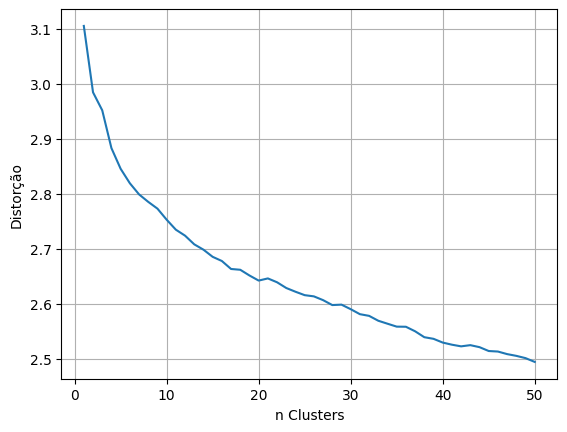

In [106]:
K = range(1, 50 + 1)

# Gráfico das distorções
fig, ax = plt.subplots()
ax.plot(K, distortions)
ax.set(xlabel='n Clusters', ylabel='Distorção')
ax.grid()
plt.show()

## Determinar número ótimo de clusters

In [107]:
import math

x0 = K[0]
y0 = distortions[0]
xn = K[-1]
yn = distortions[-1]

distancias = []
for i in range(len(distortions)):
  x = K[i]
  y = distortions[i]
  numerador = abs(
      (yn - y0) * x - (xn - x0) * y + xn * y0 - yn * x0
  )

  denominador = math.sqrt(
      (yn - y0) ** 2 + (xn - x0) ** 2
  )

  distancias.append(numerador / denominador)

numero_clusters_otimo = K[distancias.index(np.max(distancias))]
numero_clusters_otimo

13

In [109]:
from pickle import dump

cluster_model = KMeans(n_clusters=numero_clusters_otimo, random_state=42)
cluster_model.fit(df_normalizado)
cluster_model.cluster_centers_

array([[3.09296605e-01, 2.90770942e-01, 2.83047531e-01, ...,
        1.22663371e-01, 3.65054843e-01, 5.12281786e-01],
       [3.02530661e-01, 3.71452214e-01, 1.75203982e-01, ...,
        1.33257726e-01, 4.11964843e-01, 4.54777431e-01],
       [2.45176684e-01, 3.52595082e-01, 1.78852782e-01, ...,
        1.74150665e-01, 2.77555756e-15, 8.25849335e-01],
       ...,
       [2.41371694e-01, 3.35550891e-01, 1.55739013e-01, ...,
        1.03374013e-01, 7.04991621e-15, 8.96625987e-01],
       [2.60724622e-01, 2.59929683e-01, 2.70230556e-01, ...,
        9.08978021e-02, 3.00509127e-01, 6.08593071e-01],
       [2.49026192e-01, 2.73247582e-01, 3.12939333e-01, ...,
        1.26259234e-01, 2.92948287e-01, 5.80792478e-01]], shape=(13, 2405))

- Salvar o modelo de cluster

In [110]:
dump(cluster_model, open('./models/cluster.model', 'wb'))

## Nova inferência

In [113]:
df = pd.read_csv('./datasets/diabetic_data_normalized.csv', sep=',')

In [137]:
nova_inferencia = pd.DataFrame([{
    'encounter_id': 2521974,
    'patient_nbr': 80499960,
    'race': 'Caucasian',
    'gender': 'Male',
    'age': '[80-90)',
    'weight': 80,
    'admission_type_id': 6,
    'discharge_disposition_id': 3,
    'admission_source_id': 7,
    'time_in_hospital': 5,
    'payer_code': '?',
    'medical_specialty': 'InternalMedicine',
    'num_lab_procedures': 47,
    'num_procedures': 1,
    'num_medications': 6,
    'number_outpatient': 0,
    'number_emergency': 0,
    'number_inpatient': 0,
    'diag_1': 332,
    'diag_2': 294,
    'diag_3': 425,
    'number_diagnoses': 5,
    'max_glu_serum': '>200',
    'A1Cresult': 'Norm',
    'metformin': 'No',
    'repaglinide': 'No',
    'nateglinide': 'No',
    'chlorpropamide': 'No',
    'glimepiride': 'No',
    'acetohexamide': 'No',
    'glipizide': 'No',
    'glyburide': 'No',
    'tolbutamide': 'No',
    'pioglitazone': 'No',
    'rosiglitazone': 'No',
    'acarbose': 'No',
    'miglitol': 'No',
    'troglitazone': 'No',
    'tolazamide': 'No',
    'examide': 'No',
    'citoglipton': 'No',
    'insulin': 'No',
    'glyburide-metformin': 'No',
    'glipizide-metformin': 'No',
    'glimepiride-pioglitazone': 'No',
    'metformin-rosiglitazone': 'No',
    'metformin-pioglitazone': 'No',
    'change': 'No',
    'diabetesMed': 'No',
    'readmitted': np.nan,
}])

In [138]:
inferencia = nova_inferencia.drop(columns=[ 'encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult'])
inferencia

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Male,[80-90),6,3,7,5,47,1,6,...,No,No,No,No,No,No,No,No,No,NaN


In [139]:
import pandas as pd

def transform_inferencia(df_infer, scaler, reference_columns, numeric_cols):
    # 1) Normaliza numéricas
    df_num = df_infer[numeric_cols]
    df_num_norm = pd.DataFrame(
        scaler.transform(df_num),
        columns=numeric_cols,
        index=df_infer.index
    )

    # 2) Gera dummies de tudo que não for numérico
    df_cat = df_infer.drop(columns=numeric_cols)
    df_cat_dummies = pd.get_dummies(df_cat, prefix_sep='_', dtype=int)

    # 3) Concatena e realinha colunas
    df_trans = pd.concat([df_num_norm, df_cat_dummies], axis=1)
    df_trans = df_trans.reindex(columns=reference_columns, fill_value=0)

    return df_trans

In [140]:
# supondo que você tenha:
#   inferencia = pd.read_csv('inferencia.csv')
#   scaler = seu_scaler_ajustado  # p.ex. from sklearn.preprocessing import StandardScaler
#   dados_normalizado  # DataFrame de treino já normalizado

from pickle import load

scaler = load(open('./models/normalizador.model', 'rb'))

numeric_cols = [
    'time_in_hospital','num_lab_procedures','num_procedures',
    'num_medications','number_outpatient','number_emergency',
    'number_inpatient','number_diagnoses'
]

reference_columns = df_normalizado.columns.tolist()

inferencia_norm = transform_inferencia(
    inferencia,
    scaler,
    reference_columns,
    numeric_cols
)

inferencia_norm

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,0.307692,0.351145,0.166667,0.0625,0.0,0.0,0.0,0.266667,0,0,...,0,1,0,0,1,1,0,0,0,0


In [141]:
cluster_model = load(open('./models/cluster.model', 'rb'))

cluster_inferido = cluster_model.predict(inferencia_norm)
centroide = cluster_model.cluster_centers_[cluster_inferido]
print("Centroide: ")
print(centroide)

print("Cluster inferido: ")
centroide_df = pd.DataFrame(centroide, columns=inferencia_norm.columns)
centroide_df

Centroide: 
[[0.21888874 0.25745815 0.33416692 ... 0.09562869 0.27528258 0.62908873]]
Cluster inferido: 


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,0.218889,0.257458,0.334167,0.167363,0.007564,0.001041,0.020821,0.398513,0.147844,0.006602,...,-2.778268e-19,1.0,-1.389134e-19,6.050715e-15,1.0,0.805142,0.194858,0.095629,0.275283,0.629089


## Desnormalizar nova instância

In [148]:
centroide_df_numericos = centroide_df[dados_numericos.columns]

modelo_normalizador = load(open('./models/normalizador.model', 'rb'))
centroide_df_numericos_desnormalizado = modelo_normalizador.inverse_transform(centroide_df_numericos)
centroide_df_numericos_desnormalizado = pd.DataFrame(centroide_df_numericos_desnormalizado, columns=centroide_df_numericos.columns)

centroide_df_numericos_desnormalizado = pd.DataFrame(
        centroide_df_numericos_desnormalizado.round().astype(int),
        columns=numeric_cols,
        index=centroide_df_numericos_desnormalizado.index
    )

centroide_df_numericos_desnormalizado

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,4,35,2,14,0,0,0,7


In [160]:
import pandas as pd

def inverse_transform_complete(df_norm: pd.DataFrame,
                               scaler,
                               numeric_cols: list[str],
                               dummy_prefixes: list[str]) -> pd.DataFrame:

    df = df_norm.copy()

    # 1) Desnormaliza numéricas e converte para inteiro
    orig_vals = scaler.inverse_transform(df[numeric_cols].values)
    df[numeric_cols] = pd.DataFrame(
        orig_vals.round().astype(int),
        columns=numeric_cols,
        index=df.index
    )

    # 2) Para cada prefix, reconstroi a coluna categórica
    for prefix in dummy_prefixes:
        # encontra todas as colunas dummy que começam com "prefix_"
        dummy_cols = [c for c in df.columns if c.startswith(f"{prefix}_")]
        if not dummy_cols:
            continue

        # idxmax along axis=1 retorna o dummy com valor máximo (1 ou 0)
        # se todos forem zero, pega o primeiro (mas você pode ajustar se quiser NaN)
        df[prefix] = (
            df[dummy_cols]
            .idxmax(axis=1)
            .str[len(prefix)+1:]  # remove "prefix_" para ficar só a categoria
        )

        # opcional: se quiser NaN quando nenhuma dummy for 1:
        # mask = df[dummy_cols].sum(axis=1) == 0
        # df.loc[mask, prefix] = pd.NA

    # 3) Remove todas as colunas dummy
    cols_to_drop = []
    for prefix in dummy_prefixes:
        cols_to_drop += [c for c in df.columns if c.startswith(f"{prefix}_")]
    df = df.drop(columns=cols_to_drop)

    return df

modelo_normalizador = load(open('./models/normalizador.model', 'rb'))

dummy_prefixes = [
    'race', 'gender', 'age', 'admission_type_id',
    'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
    'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
    'tolazamide', 'examide', 'citoglipton', 'insulin',
    'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'
]

inferencia_desnormalizado = inverse_transform_complete(df_norm=centroide_df, scaler=modelo_normalizador, numeric_cols=centroide_df_numericos.columns, dummy_prefixes=dummy_prefixes)

In [168]:
colunas_restantes = nova_inferencia.drop(columns=inferencia_desnormalizado.columns)

colunas_ordenadas = [
    'encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
    'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 
    'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 
    'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 
    'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 
    'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
    'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 
    'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
    'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 
    'diabetesMed', 'readmitted'
]

inferencia_final = pd.concat([inferencia_desnormalizado, colunas_restantes], axis=1)
inferencia_final = inferencia_final[colunas_ordenadas]
inferencia_final

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2521974,80499960,Caucasian,Male,[70-80),80,Elective,Discharged to home,Physician Referral,4,...,No,No,No,No,No,No,No,No,No,NO


In [167]:
for col in inferencia_final:
    print(f'Coluna: {col}')
    print(f"Valor: {inferencia_final[col].iloc[0]}")
    print(f"{'-'*30}")

Coluna: encounter_id
Valor: 2521974
------------------------------
Coluna: patient_nbr
Valor: 80499960
------------------------------
Coluna: race
Valor: Caucasian
------------------------------
Coluna: gender
Valor: Male
------------------------------
Coluna: age
Valor: [70-80)
------------------------------
Coluna: weight
Valor: 80
------------------------------
Coluna: admission_type_id
Valor: Elective
------------------------------
Coluna: discharge_disposition_id
Valor: Discharged to home
------------------------------
Coluna: admission_source_id
Valor: Physician Referral
------------------------------
Coluna: time_in_hospital
Valor: 4
------------------------------
Coluna: payer_code
Valor: ?
------------------------------
Coluna: medical_specialty
Valor: InternalMedicine
------------------------------
Coluna: num_lab_procedures
Valor: 35
------------------------------
Coluna: num_procedures
Valor: 2
------------------------------
Coluna: num_medications
Valor: 14
---------------